## Dataset overview

<p style="color:blue;"> First lets Import the required libraries </p>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<p style="color:blue;"> After importing the required libraries we will now import the dataset </p>

In [19]:
# Read csv file
df_mood_smartphone = pd.read_csv("dataset_mood_smartphone.csv")  

# Remove the 'Unnamed: 0' column
df_mood_smartphone.drop('Unnamed: 0', axis=1, inplace=True)

df_mood_smartphone.head(10) # Glance of the dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,AS14.01,2014-02-27 09:00:00.000,mood,6.0
5,AS14.01,2014-02-27 12:00:00.000,mood,6.0
6,AS14.01,2014-02-27 15:00:00.000,mood,7.0
7,AS14.01,2014-03-21 09:00:00.000,mood,6.0
8,AS14.01,2014-03-21 11:00:00.000,mood,6.0
9,AS14.01,2014-03-21 15:00:00.000,mood,7.0


<p style="color:blue;"> Lets now describe the data </p>

##### The dataset has the following columns below:
1. id  &ensp; - &ensp;  unique identifier of user.
2. time  &ensp; - &ensp;  Date with time record was made.
3. variable  &ensp; - &ensp;  age in years.
- mood &ensp; - &ensp; The mood scored by the user on a scale of 1-10
- circumplex.arousal &ensp; - &ensp; The arousal scored by the user, on a scale between -2 to 2
- circumplex.valence &ensp; - &ensp; The valence scored by the user, on a scale between -2 to 2
- activity &ensp; - &ensp; Activity score of the user (number between 0 and 1)
- screen &ensp; - &ensp; Duration of screen activity (time)
- call &ensp; - &ensp; Call made (indicated by a 1)
- sms &ensp; - &ensp; SMS sent (indicated by a 1)
- appCat.builtin &ensp; - &ensp; Duration of usage of builtin apps (time)
- appCat.communication &ensp; - &ensp; Duration of usage of communication apps (time)
- appCat.entertainment &ensp; - &ensp; Duration of usage of entertainment apps (time)
- appCat.finance &ensp; - &ensp; Duration of usage of finance apps (time)
- appCat.game &ensp; - &ensp; Duration of usage of game apps (time)
- appCat.office &ensp; - &ensp; Duration of usage of office apps (time)
- appCat.other &ensp; - &ensp; Duration of usage of other apps (time)
- appCat.social &ensp; - &ensp; Duration of usage of social apps (time)
- appCat.travel &ensp; - &ensp; Duration of usage of travel apps (time)
- appCat.unknown &ensp; - &ensp; Duration of usage of unknown apps (time)
- appCat.utilities &ensp; - &ensp; Duration of usage of utilities apps (time)
- appCat.weather &ensp; - &ensp; Duration of usage of weather apps (time)
4. value  &ensp; - &ensp;  a number associated to variable.

## EXPLORATORY DATA ANALYSIS (EDA) ## 

In [23]:
# Check the number of records and attributes
num_records, num_attributes = df_mood_smartphone.shape
print(f"Number of records: {num_records}")
print(f"Number of attributes: {num_attributes}")

Number of records: 376912
Number of attributes: 4


In [24]:
#tstatistical information about the data
print(df_mood_smartphone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        376912 non-null  object 
 1   time      376912 non-null  object 
 2   variable  376912 non-null  object 
 3   value     376710 non-null  float64
dtypes: float64(1), object(3)
memory usage: 11.5+ MB
None


In [25]:
# Find the minimum and maximum values for each column
min_values = df_mood_smartphone.min()
max_values = df_mood_smartphone.max()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)

Minimum values:
id                          AS14.01
time        2014-02-17 07:00:52.197
variable                   activity
value                    -82798.871
dtype: object

Maximum values:
id                          AS14.33
time        2014-06-09 00:00:00.000
variable                        sms
value                     33960.246
dtype: object


In [26]:
# Summary statistics
print(df_mood_smartphone.describe())

               value
count  376710.000000
mean       40.665313
std       273.726007
min    -82798.871000
25%         2.025000
50%         7.029000
75%        29.356000
max     33960.246000


In [27]:
# Check for missing values
print(df_mood_smartphone.isnull().sum())

id            0
time          0
variable      0
value       202
dtype: int64


In [28]:
# Get unique values for the 'variable' column
unique_variables = df_mood_smartphone['variable'].unique()

# Print the unique values
print(unique_variables)


['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


In [29]:
# lets now filter the DataFrame to select rows for a specific ID
rows_for_id = df_mood_smartphone[(df_mood_smartphone['id'] == 'AS14.01') & (df_mood_smartphone['variable'] == 'mood')]

# Print the filtered rows
print(rows_for_id.head())


        id                     time variable  value
0  AS14.01  2014-02-26 13:00:00.000     mood    6.0
1  AS14.01  2014-02-26 15:00:00.000     mood    6.0
2  AS14.01  2014-02-26 18:00:00.000     mood    6.0
3  AS14.01  2014-02-26 21:00:00.000     mood    7.0
4  AS14.01  2014-02-27 09:00:00.000     mood    6.0


In [30]:
#Lets check the rows with variable mood

# fetching all rows with variable mood
all_rows = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood']

# all the userid list
ids_list = all_rows['id'].tolist()
ids = set()

# Iterate through each dictionary in the list
for item in ids_list:
    # Add the ID to the set
    ids.add(item)

# Convert the set to a list
print(sorted(ids))

['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07', 'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15', 'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30', 'AS14.31', 'AS14.32', 'AS14.33']


## DATA CLEANING ## 

Lets use forward fill to fill in the missing values. The fact that we are dealing with mode scores and its time series data this will help us to preserve the temporal structure of the data

In [31]:
# Fill missing values using forward fill
df_mood_smartphone['value'].fillna(method='ffill', inplace=True)

In [32]:
print(df_mood_smartphone.isnull().sum())

id          0
time        0
variable    0
value       0
dtype: int64


## CHARTS ## 

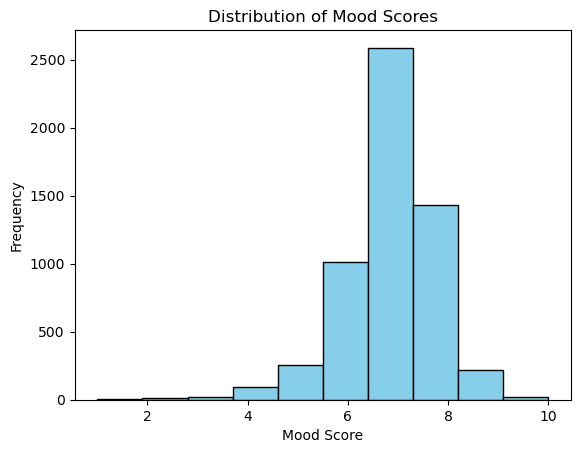

In [33]:
# Distribution of mood scores for variable mood
plt.hist(df_mood_smartphone[df_mood_smartphone['variable'] == 'mood']['value'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Mood Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mood Scores')
plt.show()

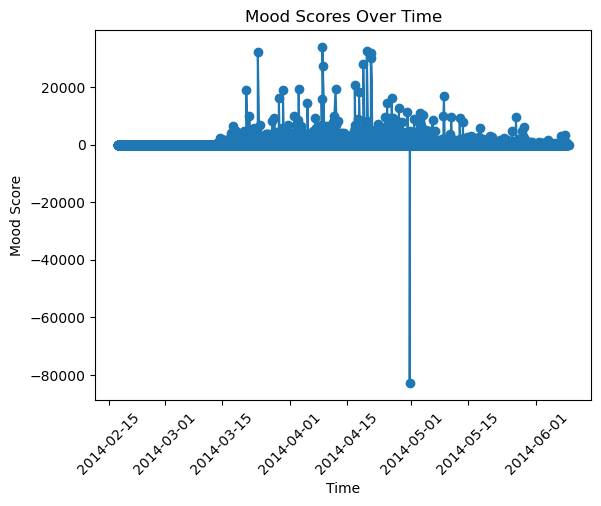

In [34]:
# Convert 'time' column to datetime
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Plot mood scores over time
plt.plot(df_mood_smartphone['time'], df_mood_smartphone['value'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Mood Score')
plt.title('Mood Scores Over Time')
plt.xticks(rotation=45)
plt.show()

## FEATURE ENGINEERING ## 

In [35]:
# Convert Timestamp to datetime
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])

# Extract date from Timestamp
df_mood_smartphone['Date'] = df_mood_smartphone['time'].dt.date

# Aggregate mood scores by day
daily_mood = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood'].groupby(['id', 'Date'])['value'].mean().reset_index()

# Extracting temporal features
df_mood_smartphone['time'] = pd.to_datetime(df_mood_smartphone['time'])
df_mood_smartphone['Day'] = df_mood_smartphone['time'].dt.day
df_mood_smartphone['Month'] = df_mood_smartphone['time'].dt.month
df_mood_smartphone['Year'] = df_mood_smartphone['time'].dt.year

# Calculate daily averages for mood scores
daily_mood = df_mood_smartphone[df_mood_smartphone['variable'] == 'mood'].groupby('time')['value'].mean().reset_index()

# Display the first few rows
print(daily_mood.head())

                 time  value
0 2014-02-26 13:00:00    6.0
1 2014-02-26 15:00:00    6.0
2 2014-02-26 18:00:00    6.0
3 2014-02-26 21:00:00    7.0
4 2014-02-27 09:00:00    6.0
